# Generating a simulated tracking dataset for data visualisation

Plan for milestones:
1. Create cell that moves at constant speed in two dimensions (DONE)
2. Make cell bounce of walls (DONE)
3. Add in random reorientation (tumbling):
    1. After given time (DONE)
    2. After numerical threshold exceeded: random number generator (DONE)
    3. Increasing probability with time since last tumble (DONE)
    4. Dependency on attractant concentration
    5. (Dependency on attractant gradient - already account for adaptation with time dependency and continuous accounting for attractant concentration -> could do alternative model later)
4. Add in bacterial metabolism of attractant (optional)
5. Add in diffusion of attractant (optional optional)
6. Decomposition
7. Save outcomes to file
8. Run many times

Plotting:
- Visualise tracks
- Compare different attractant patterns and associated parameters
    - Total displacement?
    - Velocity?
    - x and y displacement separately?

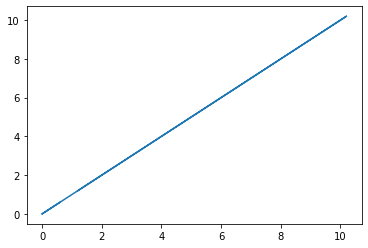

In [44]:
# milestones 1 and 2

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.path as mpath


#set up constants
START_TIME = 0.0
END_TIME = 10.0
TIME_INCREMENT = 0.1
STEP_NUMBER = int(END_TIME/TIME_INCREMENT)

SPEED_X = 2
SPEED_Y = 2

WORLD_SIZE_X = 10.0
WORLD_SIZE_Y = 10.0


#set up variables
x = 1
y = 1 
time = START_TIME
cell_location_x = np.zeros(STEP_NUMBER)
cell_location_y = np.zeros(STEP_NUMBER)
path_array = np.zeros((STEP_NUMBER, 2))

#helper functions
def x_out_of_bounds(x):
    return x >= WORLD_SIZE_X or x <= 0
    
def y_out_of_bounds(y):
    return y >= WORLD_SIZE_Y or y <= 0


#run code
for i in range(STEP_NUMBER):
    if x_out_of_bounds(x):
        SPEED_X = -SPEED_X
    if y_out_of_bounds(y):
        SPEED_Y = -SPEED_Y
    x = x + SPEED_X * TIME_INCREMENT
    y = y + SPEED_Y * TIME_INCREMENT
    cell_location_x[i] = x
    cell_location_y[i] = y
    time = time + TIME_INCREMENT


#plotting
plt.plot(cell_location_x.T, cell_location_y.T)
plt.show()

In [34]:
cell_location_x

array([ 1.20000000e+00,  1.40000000e+00,  1.60000000e+00,  1.80000000e+00,
        2.00000000e+00,  2.20000000e+00,  2.40000000e+00,  2.60000000e+00,
        2.80000000e+00,  3.00000000e+00,  3.20000000e+00,  3.40000000e+00,
        3.60000000e+00,  3.80000000e+00,  4.00000000e+00,  4.20000000e+00,
        4.40000000e+00,  4.60000000e+00,  4.80000000e+00,  5.00000000e+00,
        5.20000000e+00,  5.40000000e+00,  5.60000000e+00,  5.80000000e+00,
        6.00000000e+00,  6.20000000e+00,  6.40000000e+00,  6.60000000e+00,
        6.80000000e+00,  7.00000000e+00,  7.20000000e+00,  7.40000000e+00,
        7.60000000e+00,  7.80000000e+00,  8.00000000e+00,  8.20000000e+00,
        8.40000000e+00,  8.60000000e+00,  8.80000000e+00,  9.00000000e+00,
        9.20000000e+00,  9.40000000e+00,  9.60000000e+00,  9.80000000e+00,
        1.00000000e+01,  1.02000000e+01,  1.00000000e+01,  9.80000000e+00,
        9.60000000e+00,  9.40000000e+00,  9.20000000e+00,  9.00000000e+00,
        8.80000000e+00,  

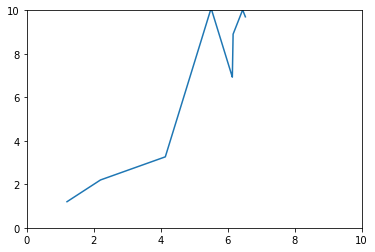

In [80]:
# milestone 3a

import numpy as np
import matplotlib.pyplot as plt
import random


#set up constants
START_TIME = 0.0
END_TIME = 10.0
TIME_INCREMENT = 0.1
STEP_NUMBER = int(END_TIME/TIME_INCREMENT)
REORIENTATION_MOMENT = (5, 20, 80, 90)
TOTAL_SPEED = 2.0

WORLD_SIZE_X = 10.0
WORLD_SIZE_Y = 10.0


#set up variables
x = 1
y = 1 
speed_x = 2
speed_y = 2
time = START_TIME
cell_location_x = np.zeros(STEP_NUMBER)
cell_location_y = np.zeros(STEP_NUMBER)
path_array = np.zeros((STEP_NUMBER, 2))

#helper functions
def x_out_of_bounds(x):
    return x >= WORLD_SIZE_X or x <= 0
    
def y_out_of_bounds(y):
    return y >= WORLD_SIZE_Y or y <= 0


#run code
for i in range(STEP_NUMBER):
    if x_out_of_bounds(x):
        speed_x = -speed_x
    if y_out_of_bounds(y):
        speed_y = -speed_y
    x = x + speed_x * TIME_INCREMENT
    y = y + speed_y * TIME_INCREMENT
    cell_location_x[i] = x
    cell_location_y[i] = y
    time = time + TIME_INCREMENT
    if i in REORIENTATION_MOMENT:
        speed_x = random.uniform(0, TOTAL_SPEED)
        speed_y = TOTAL_SPEED - speed_x


#plotting
plt.plot(cell_location_x.T, cell_location_y.T)
axes = plt.gca()
axes.set_xlim([0.0,10.0])
axes.set_ylim([0.0,10.0])
plt.show()

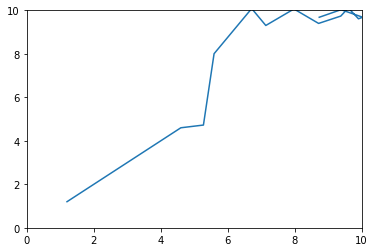

In [83]:
# milestone 3b

import numpy as np
import matplotlib.pyplot as plt
import random


#set up constants
START_TIME = 0.0
END_TIME = 10.0
TIME_INCREMENT = 0.1
STEP_NUMBER = int(END_TIME/TIME_INCREMENT)
REORIENTATION_MOMENT = (5, 20, 80, 90)
TOTAL_SPEED = 2.0

WORLD_SIZE_X = 10.0
WORLD_SIZE_Y = 10.0


#set up variables
x = 1
y = 1 
speed_x = 2
speed_y = 2
time = START_TIME
cell_location_x = np.zeros(STEP_NUMBER)
cell_location_y = np.zeros(STEP_NUMBER)
path_array = np.zeros((STEP_NUMBER, 2))

#helper functions
def x_out_of_bounds(x):
    return x >= WORLD_SIZE_X or x <= 0
    
def y_out_of_bounds(y):
    return y >= WORLD_SIZE_Y or y <= 0

def reorientation():
    random_number = random.uniform(0.0,5.0)
    return random_number > 4.5


#run code
for i in range(STEP_NUMBER):
    if x_out_of_bounds(x):
        speed_x = -speed_x
    if y_out_of_bounds(y):
        speed_y = -speed_y
    x = x + speed_x * TIME_INCREMENT
    y = y + speed_y * TIME_INCREMENT
    cell_location_x[i] = x
    cell_location_y[i] = y
    time = time + TIME_INCREMENT
    if reorientation():
        speed_x = random.uniform(0, TOTAL_SPEED)
        speed_y = TOTAL_SPEED - speed_x


#plotting
plt.plot(cell_location_x.T, cell_location_y.T)
axes = plt.gca()
axes.set_xlim([0.0,10.0])
axes.set_ylim([0.0,10.0])
plt.show()

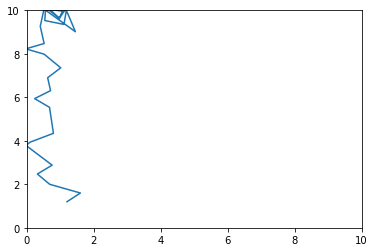

In [110]:
# milestone 3c
#fix that speeds are never negative until wall is hit (by adjusting random speed_x range to include negative values)

import numpy as np
import matplotlib.pyplot as plt
import random
import math


#set up constants
START_TIME = 0.0
END_TIME = 10.0
TIME_INCREMENT = 0.1
STEP_NUMBER = int(END_TIME/TIME_INCREMENT)
REORIENTATION_MOMENT = (5, 20, 80, 90)
TOTAL_SPEED = 2.0

WORLD_SIZE_X = 10.0
WORLD_SIZE_Y = 10.0


#set up variables
x = 1
y = 1 
speed_x = 2
speed_y = 2
time = START_TIME
time_last_tumble = START_TIME
cell_location_x = np.zeros(STEP_NUMBER)
cell_location_y = np.zeros(STEP_NUMBER)
path_array = np.zeros((STEP_NUMBER, 2))

#helper functions
def x_out_of_bounds(x):
    return x >= WORLD_SIZE_X or x <= 0
    
def y_out_of_bounds(y):
    return y >= WORLD_SIZE_Y or y <= 0

def reorientation(time, time_last_tumble):
    random_number = random.uniform(0.0,5.0)
    time_since_last_tumble = time - time_last_tumble
    time_dependent_random_number = time_since_last_tumble * random_number
    return time_dependent_random_number > 1.0


#run code
for i in range(STEP_NUMBER):
    if x_out_of_bounds(x):
        speed_x = -speed_x
    if y_out_of_bounds(y):
        speed_y = -speed_y
    x = x + speed_x * TIME_INCREMENT
    y = y + speed_y * TIME_INCREMENT
    cell_location_x[i] = x
    cell_location_y[i] = y
    time = time + TIME_INCREMENT
    if reorientation(time, time_last_tumble):
        speed_x = random.uniform(-TOTAL_SPEED, TOTAL_SPEED)
        speed_y = math.sqrt(TOTAL_SPEED**2 - speed_x**2)
        time_last_tumble = time


#plotting
plt.plot(cell_location_x.T, cell_location_y.T)
axes = plt.gca()
axes.set_xlim([0.0,10.0])
axes.set_ylim([0.0,10.0])
plt.show()

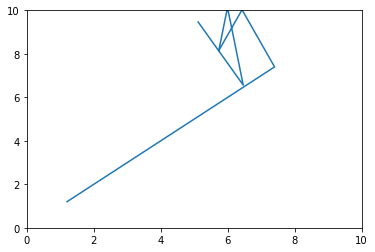

In [129]:
# milestone 3d: attractant concentration

import numpy as np
import matplotlib.pyplot as plt
import random
import math


#set up constants
START_TIME = 0.0
END_TIME = 10.0
TIME_INCREMENT = 0.1
STEP_NUMBER = int(END_TIME/TIME_INCREMENT)
REORIENTATION_MOMENT = (5, 20, 80, 90)
TOTAL_SPEED = 2.0

WORLD_SIZE_X = 10.0
WORLD_SIZE_Y = 10.0

#set up variables
x = 1
y = 1 
speed_x = 2
speed_y = 2
time = START_TIME
time_last_tumble = START_TIME
cell_location_x = np.zeros(STEP_NUMBER)
cell_location_y = np.zeros(STEP_NUMBER)
path_array = np.zeros((STEP_NUMBER, 2))

#helper functions
def x_out_of_bounds(x):
    return x >= WORLD_SIZE_X or x <= 0
    
def y_out_of_bounds(y):
    return y >= WORLD_SIZE_Y or y <= 0

def attractant(x, y):
    attractant_concentration = 2 * x
    return attractant_concentration

def reorientation(time, time_last_tumble, x, y):
    random_number = random.uniform(0.0,5.0)
    attractant_concentration = attractant(x, y)
    time_since_last_tumble = time - time_last_tumble
    time_dependent_random_number = time_since_last_tumble * random_number
    return time_dependent_random_number / attractant_concentration > 1.0


#run code
for i in range(STEP_NUMBER):
    if x_out_of_bounds(x):
        speed_x = -speed_x
    if y_out_of_bounds(y):
        speed_y = -speed_y
    x = x + speed_x * TIME_INCREMENT
    y = y + speed_y * TIME_INCREMENT
    cell_location_x[i] = x
    cell_location_y[i] = y
    time = time + TIME_INCREMENT
    if reorientation(time, time_last_tumble, x, y):
        speed_x = random.uniform(-TOTAL_SPEED, TOTAL_SPEED)
        speed_y = math.sqrt(TOTAL_SPEED**2 - speed_x**2)
        time_last_tumble = time


#plotting
plt.plot(cell_location_x.T, cell_location_y.T)
axes = plt.gca()
axes.set_xlim([0.0,10.0])
axes.set_ylim([0.0,10.0])
plt.show()

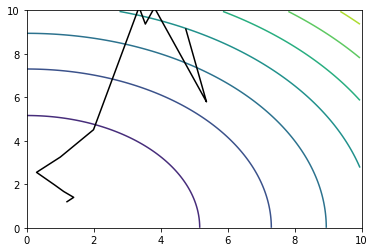

In [167]:
# milestone: plot attractant concentration

import numpy as np
import matplotlib.pyplot as plt
import random
import math


#set up constants
START_TIME = 0.0
END_TIME = 10.0
TIME_INCREMENT = 0.1
STEP_NUMBER = int(END_TIME/TIME_INCREMENT)
REORIENTATION_MOMENT = (5, 20, 80, 90)
TOTAL_SPEED = 2.0

WORLD_SIZE_X = 10.0
WORLD_SIZE_Y = 10.0

#set up variables
x = 1
y = 1 
speed_x = 2
speed_y = 2
time = START_TIME
time_last_tumble = START_TIME
cell_location_x = np.zeros(STEP_NUMBER)
cell_location_y = np.zeros(STEP_NUMBER)
path_array = np.zeros((STEP_NUMBER, 2))

#helper functions
def x_out_of_bounds(x):
    return x >= WORLD_SIZE_X or x <= 0
    
def y_out_of_bounds(y):
    return y >= WORLD_SIZE_Y or y <= 0

def attractant(x, y):
    attractant_concentration = 0.15*x**2 + 0.15*y**2
    #if attractant_concentration <= 0.1:
        #attractant_concentration = 0.1
    return attractant_concentration

def reorientation(time, time_last_tumble, x, y):
    random_number = random.uniform(0.0,5.0)
    attractant_concentration = attractant(x, y)
    time_since_last_tumble = time - time_last_tumble
    time_dependent_random_number = time_since_last_tumble * random_number
    return time_dependent_random_number / attractant_concentration > 1.0


#run code
for i in range(STEP_NUMBER):
    if x_out_of_bounds(x):
        speed_x = -speed_x
    if y_out_of_bounds(y):
        speed_y = -speed_y
    x = x + speed_x * TIME_INCREMENT
    y = y + speed_y * TIME_INCREMENT
    cell_location_x[i] = x
    cell_location_y[i] = y
    time = time + TIME_INCREMENT
    if reorientation(time, time_last_tumble, x, y):
        speed_x = random.uniform(-TOTAL_SPEED, TOTAL_SPEED)
        speed_y = math.sqrt(TOTAL_SPEED**2 - speed_x**2)
        time_last_tumble = time


#plotting
plt.plot(cell_location_x.T, cell_location_y.T, 'k')
axes = plt.gca()
axes.set_xlim([0.0,10.0])
axes.set_ylim([0.0,10.0])


vector_attractant = np.vectorize(attractant)
xa, ya = np.meshgrid(np.arange(0.0,10.0,0.05), np.arange(0.0,10.0,0.05))
plt.contour(xa, ya, vector_attractant(xa, ya))
#https://stackoverflow.com/questions/42953266/contour-plots-using-a-function

plt.show()

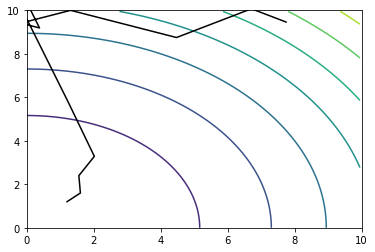

In [187]:
# milestone: write to file

import numpy as np
import matplotlib.pyplot as plt
import random
import math
import pandas as pd


#set up constants
START_TIME = 0.0
END_TIME = 10.0
TIME_INCREMENT = 0.1
STEP_NUMBER = int(END_TIME/TIME_INCREMENT)
REORIENTATION_MOMENT = (5, 20, 80, 90)
TOTAL_SPEED = 2.0

WORLD_SIZE_X = 10.0
WORLD_SIZE_Y = 10.0

#set up variables
x = 1
y = 1 
speed_x = 2
speed_y = 2
time = START_TIME
time_last_tumble = START_TIME
cell_location_x = np.zeros(STEP_NUMBER)
cell_location_y = np.zeros(STEP_NUMBER)
path_array = np.zeros((STEP_NUMBER, 2))

#helper functions
def x_out_of_bounds(x):
    return x >= WORLD_SIZE_X or x <= 0
    
def y_out_of_bounds(y):
    return y >= WORLD_SIZE_Y or y <= 0

def attractant(x, y):
    attractant_concentration = 0.15*x**2 + 0.15*y**2
    #if attractant_concentration <= 0.1:
        #attractant_concentration = 0.1
    return attractant_concentration

def reorientation(time, time_last_tumble, x, y):
    random_number = random.uniform(0.0,5.0)
    attractant_concentration = attractant(x, y)
    time_since_last_tumble = time - time_last_tumble
    time_dependent_random_number = time_since_last_tumble * random_number
    return time_dependent_random_number / attractant_concentration > 0.8


#run code
def get_trace():
    x = 1
    y = 1 
    speed_x = 2
    speed_y = 2
    time = START_TIME
    time_last_tumble = START_TIME
    cell_location_x = np.zeros(STEP_NUMBER)
    cell_location_y = np.zeros(STEP_NUMBER)
    path_array = np.zeros((STEP_NUMBER, 2))


    for i in range(STEP_NUMBER):
        if x_out_of_bounds(x):
            speed_x = -speed_x
        if y_out_of_bounds(y):
            speed_y = -speed_y
        x = x + speed_x * TIME_INCREMENT
        y = y + speed_y * TIME_INCREMENT
        cell_location_x[i] = x
        cell_location_y[i] = y
        time = time + TIME_INCREMENT
        if reorientation(time, time_last_tumble, x, y):
            speed_x = random.uniform(-TOTAL_SPEED, TOTAL_SPEED)
            speed_y = math.sqrt(TOTAL_SPEED**2 - speed_x**2)
            time_last_tumble = time
    return cell_location_x, cell_location_y


#run code many times
REPEAT_NUMBER = 1
database = []
for i in range(REPEAT_NUMBER):
    (cell_location_x, cell_location_y) = get_trace()
    database = [cell_location_x, cell_location_y]

df = pd.DataFrame(database)
df = df.transpose()
df.columns = ['x-coordinate','y-coordinate']
        
#plotting
plt.plot(cell_location_x.T, cell_location_y.T, 'k')
axes = plt.gca()
axes.set_xlim([0.0,10.0])
axes.set_ylim([0.0,10.0])


vector_attractant = np.vectorize(attractant)
xa, ya = np.meshgrid(np.arange(0.0,10.0,0.05), np.arange(0.0,10.0,0.05))
plt.contour(xa, ya, vector_attractant(xa, ya))
#https://stackoverflow.com/questions/42953266/contour-plots-using-a-function

plt.show()

In [188]:
df

,x-coordinate,y-coordinate
0,1.200000,1.200000
1,1.400000,1.400000
2,1.600000,1.600000
3,1.588540,1.799671
4,1.577081,1.999343
...,...,...
95,7.053693,9.869673
96,7.225902,9.767967
97,7.398111,9.666261
98,7.570320,9.564556


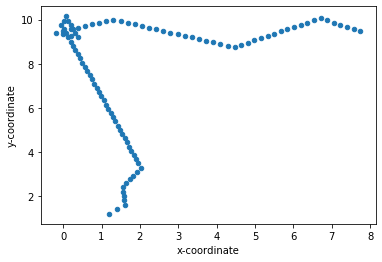

In [189]:
df.plot.scatter(x='x-coordinate', y='y-coordinate')

In [ ]:
#https://stackoverflow.com/questions/54508791/how-do-i-plot-a-trace-of-an-objects-path-in-python